In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

# Load the image in grayscale
img = cv2.imread('blackboard.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


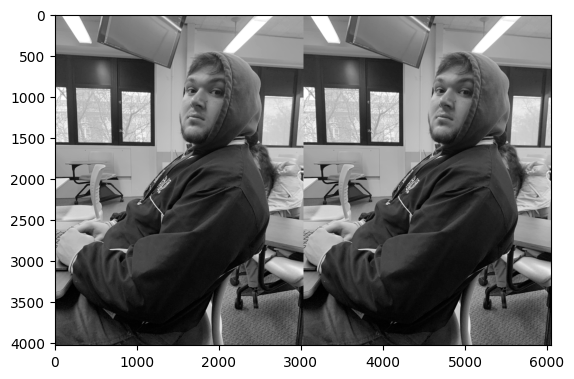

In [ ]:
gaus_F = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
], dtype=np.float32)/16
imgGaus = cv2.filter2D(img, -1, gaus_F)

dis = np.concatenate((img,imgGaus), axis=1)
plt.imshow(dis, cmap="gray")

In [ ]:

# Apply Sobel operator to detect edges in x and y directions
sobelx = cv2.Sobel(imgGaus, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(imgGaus, cv2.CV_64F, 0, 1, ksize=5)

# Compute the gradient magnitude 
grad_mag = cv2.magnitude(sobelx, sobely)

_, threshold  = cv2.threshold(grad_mag, 150, 255, cv2.THRESH_BINARY)



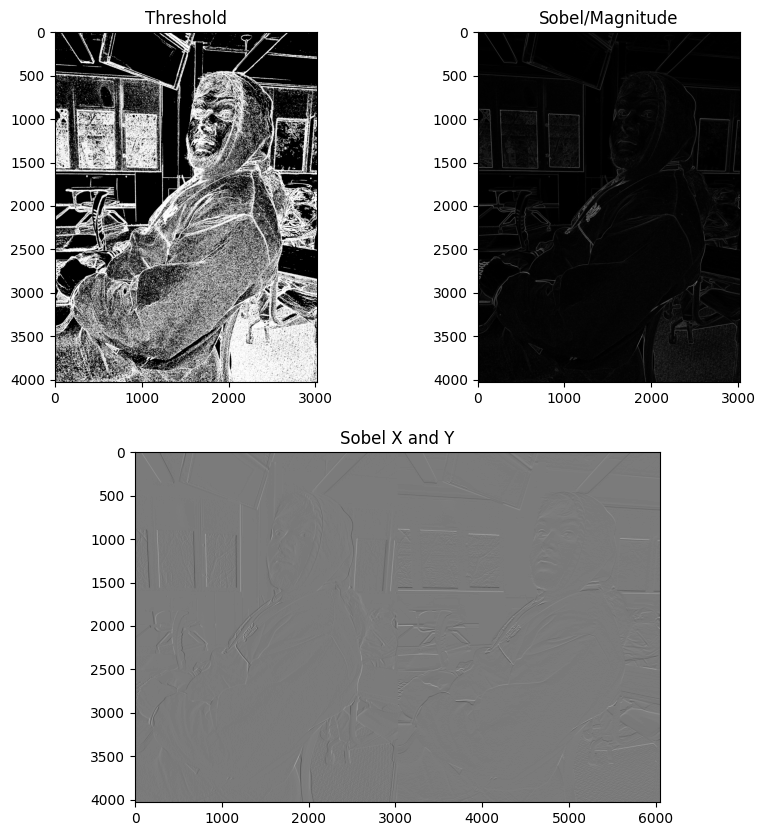

In [ ]:

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1), plt.imshow(threshold, cmap='gray')
plt.title('Threshold')
plt.subplot(2, 2, 2), plt.imshow(grad_mag, cmap='gray')
plt.title('Sobel/Magnitude')

dis2 = np.concatenate((sobelx,sobely), axis=1)
plt.subplot(2, 1, 2), plt.imshow(dis2, cmap='gray')
plt.title('Sobel X and Y')


plt.show()